[WARN]Not finding data.py
[WARN]Not finding data.py
is in ipython: 1
alias of mapper 11001010: 202
rulestring of rule 110: 01110110


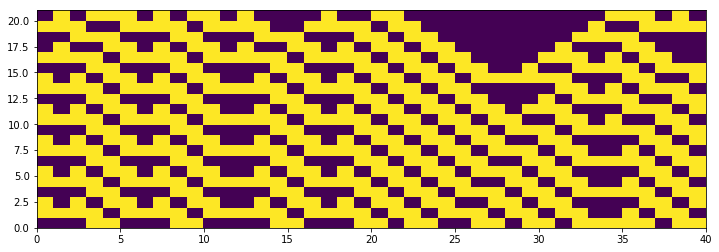

In [1]:
from recur import *
import KBs
reload(KBs)
import KBs
from KBs import *
from pymisca.util import *

### To be compiled
def printmat(mat,sep=',',offset=0):
    if isinstance(mat,np.ndarray):
        mat=  mat.tolist()
    printlines([sep.join(str(y) for y in  x) for x in mat])
#     printlines([sep.join(str(y) for y in ('-,')*offset + x) for x in mat])

kb  = kb_eca()
rstr = '11001010'
alias = kb.rulestr2alias(rstr)
print 'alias of mapper %s:'%rstr,alias
print 'rulestring of rule 110:',kb.alias2rulestr('110')

random.seed(0)
np.random.seed(30)
env = CA_sys()
env.family= kb_eca()
# env.alias = '110'
env.alias = '118'
env.alias2rulestr()
env.change_size((1,100,40**2))
hist = sample(env,T=20)
# hist.shape
out = np.take(hist,0,axis=-1)
showsptime(out[::-1])
plt.show()



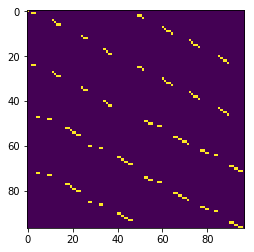

No of all tiles: 47260
[(47191, [18, 35, 25, 49, 52]), (47209, [21, 86, 32, 63, 79]), (47224, [22, 88, 80]), (47257, [70, 93, 46, 89, 83]), (47259, [0])]
Found tiles (len<5): [(47191, [18, 35, 25, 49, 52]), (47209, [21, 86, 32, 63, 79]), (47224, [22, 88, 80]), (47257, [70, 93, 46, 89, 83]), (47259, [0])]
(101, 1, 3, 1)


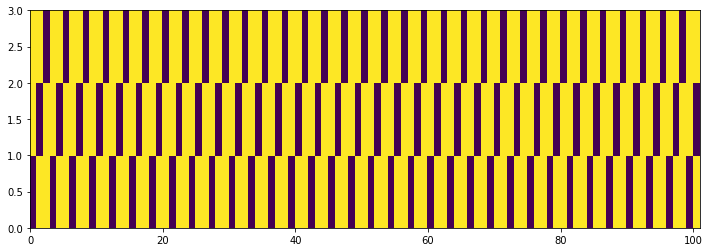

CPU times: user 2.2 s, sys: 444 ms, total: 2.64 s
Wall time: 2.11 s


In [2]:
%%time
####################################################################
#########oooo|oooo|xxx|xxxx|oooo####################################
####################################################################
####################################################################
#########oooo|xxxc|xxx|oooo|oooo####################################
#########Left##########Right######################################
## source: left  oooo
## sink  : right oooo
## find paths from LEFT tiles to RIGHT tiles through glider tlies (xxxx)


# main(per=1,T=3)


import simpleCycles
### Look for a period 2 glider, speed c/2 on a period 3 backgd
### common product is 6, drift is 3/period

### find period 2 static tiling
### Decide a background to use

Tbk = 3
tile0 = par2tiles(env,T=Tbk,per=0,n=1)
tile = tile0
curr = pre2curr(tile,mid=1)
# print mat2str(tile_flatten(tile0))
amat = tile2adj(tile0)

#### Possible speed up
# interm = (amat.sum(axis=0))&(amat.sum(axis=1))!=0
# print interm.shape
# amat=  amat[interm,:][:,interm]
# print amat.shape

plt.imshow(amat)
plt.show()



cks = simpleCycles.simple_cycles(adj2dct(amat))
# import networkx as nx
# g = nx.DiGraph(amat)
# cks = nx.simple_cycles(g)
cks = list(cks)
print 'No of all tiles:',len(cks)
cks = filter(lambda (i,x):len(x)<=5,enumerate(cks))
# print len(cks)
print cks[:10]

# ck = cks[0]
ck = cks[2]
i,ck = ck
bkd = sum([curr[x] for x in ck],())
print 'Found tiles (len<5):',cks[:10]

show_cycle(env,ck,curr)
plt.show()


In [3]:
### Manually selecting background to search
# ck = cks[2]
# i,ck = ck
# bkd = sum([curr[x] for x in ck],())
# print bkd

# print cycle_cut(bkd,5)
# print cycle_cut(bkd,-5)

In [4]:
# %%time
##### Looking for glider compatible on this background
# Tbk = ?
per = 2 #### period of glider
Tb = lcm(abs(per),Tbk)
drift = Tb//per
Lb = lcm(abs(drift),len(bkd))
assert Lb <= 5
assert Tb <=10
print Tb
print drift
print Lb

spper = Tb//per/Lb
assert isinstance(spper,int)

#### Construct glider tile
tile = tile_flatten(par2tiles(env,n=Lb,T=Tb,per=per))
##### filter glider tile to make sure it's non-stationary
# tile = [x for x,_ in filter(lambda (x,y): tuple(x[2+Tb:-Tb])!=tuple(y),zip(tile,pre2curr(tile)))]
# assert tile
tileG = tile

##### List background tiles
tile0 = main(env,glider=bkd,T=Tb,per=0,findall=1)
curr = pre2curr(tile0)
tile0 = tile_flatten(tile0)


### Construct Right bkgd tile
L = -(Tb + (1-spper)*Lb)
print L
tileRight = tile_filter(tile0,L,bkd)

### Construct Left bkgd tile
L = Tb + (1+spper)* Lb
print L
tileLeft = tile_filter(tile0,L,bkd)

print len(tile0)
print len(tileLeft)
print len(tileRight)
print len(tileG)


msg = '''
### Finding paths on the Graph
'''
print msg

tile = sum([ x.tolist() if not isinstance(x,list) else x  for x in 
            [tileLeft,tileRight,tileG]] ,
          [])
curr = pre2curr(tile,mid=0,env=env)

T = Tb
heads  = [x[2:2+2*T] for x in tile]
tails  = [x[-2*T:] for x in tile]
amat = np.array(tails)[:,None] == np.array(heads)[None,:]
print amat.shape
amat = np.all( amat,axis=-1)
g = Graph.Adjacency(amat.tolist())


# find_all_paths(g,0,1)
tLidx = range(len(tileLeft))
tRidx = range(len(tileLeft),len(tileLeft)+len(tileRight))
lst = []
res = map(lambda L: g.get_shortest_paths(L,tRidx),tLidx)

out = sum(res,[])
out = [x for x in out if x]
print out[:10]
print 'Number of paths:',len(out)

6
3
3
-6
(176, 176)
12
(8, 8)
6933
8
176
6077

### Finding paths on the Graph

(6261, 6261, 12)
[[1, 413, 2345, 4681, 42], [1, 413, 2346, 5952, 43], [1, 414, 3215, 4689, 45], [1, 415, 4730, 78, 47], [1, 415, 4733, 4697, 48], [1, 415, 4734, 5956, 49], [1, 415, 4730, 78], [1, 415, 4730, 78, 47, 149, 83], [1, 415, 4730, 1247, 2247, 5390, 86], [1, 415, 4730, 1247, 2248, 6159, 87]]
Number of paths: 112


/home/shouldsee/.local/lib/python2.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: Couldn't reach some vertices at structural_properties.c:740


In [5]:


per = [x[1] for x in tile]
per_gb =  [sum(per[i] for i in x) for x in out]

print per_gb
# i = 82
# i = 0
lst = np.where(np.array(per_gb)>0)[0]
print 'Nonzero drift:',lst

import sys

def show(i,verbose=0):
    '''
    Take tiles and visualise them
    '''
    print i
    ck = out[i]
    ck = ck[0:1]*2 + ck + ck[-1:]*2
    if verbose:
        for i,x in enumerate(ck):
            print '%s\t'%x,
            sys.stdout.write('-,'*i*Lb)
#             print('-,'*i)
            print mat2str([tile[x][2:]],sep=',')
        print ck 
        print [curr[x] for x in ck]
    show_cycle( env,ck,curr)
# print per_gb
# print np.where(np.array(per_gb)==0)[0]
    plt.show()
# out[0]

[6, 6, 6, 4, 6, 6, 4, 4, 10, 10, 10, 6, 8, 8, 6, 8, 8, 8, 6, 8, 8, 4, 6, 8, 8, 6, 10, 6, 6, 6, 6, 4, 6, 6, 4, 0, 4, 4, 4, 4, 6, 6, 4, 6, 6, 6, 4, 6, 6, 4, 6, 8, 8, 6, 8, 4, 10, 10, 10, 8, 10, 10, 10, 4, 4, 4, 10, 4, 6, 6, 4, 12, 12, 12, 10, 12, 12, 4, 6, 8, 8, 6, 8, 4, 12, 12, 12, 10, 12, 12, 10, 4, 10, 10, 4, 6, 8, 8, 6, 6, 6, 6, 4, 6, 6, 4, 6, 8, 8, 6, 10, 6]
Nonzero drift: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111]


0
1	0,1,1,0,1,1,0,1,1,0,1,1,0,0,1
1	-,-,-,0,1,1,0,1,1,0,1,1,0,1,1,0,0,1
1	-,-,-,-,-,-,0,1,1,0,1,1,0,1,1,0,1,1,0,0,1
413	-,-,-,-,-,-,-,-,-,0,1,1,0,1,1,0,1,1,0,0,1,1,0,0
2345	-,-,-,-,-,-,-,-,-,-,-,-,0,1,1,0,1,1,0,0,1,1,0,0,1,1,0
4681	-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1
42	-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,1,1,0,0,1,1,0,0,1,1,0,1,1
42	-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,1,1,0,0,1,1,0,0,1,1,0,1,1
42	-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,0,0,1,1,0,0,1,1,0,0,1,1,0,1,1
[1, 1, 1, 413, 2345, 4681, 42, 42, 42]
[array([0, 1, 1]), array([0, 1, 1]), array([0, 1, 1]), array([0, 0, 1]), array([1, 0, 0]), array([1, 1, 0]), array([0, 1, 1]), array([0, 1, 1]), array([0, 1, 1])]
(101, 1, 27, 1)


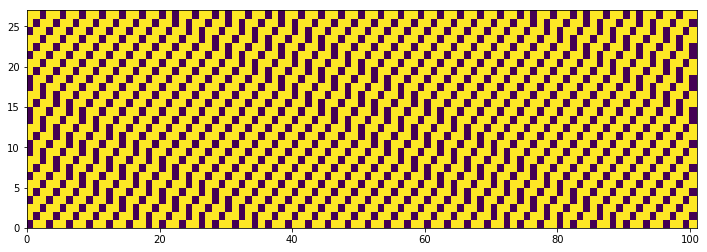

In [6]:
show(0,verbose=1)

0
(101, 1, 27, 1)


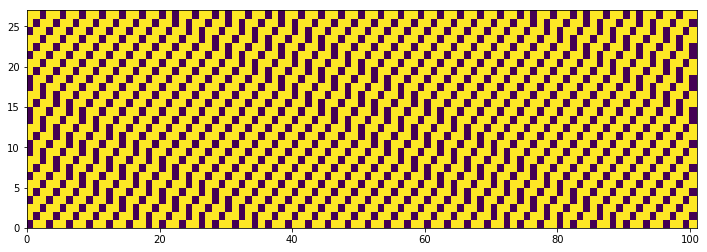

1
(101, 1, 27, 1)


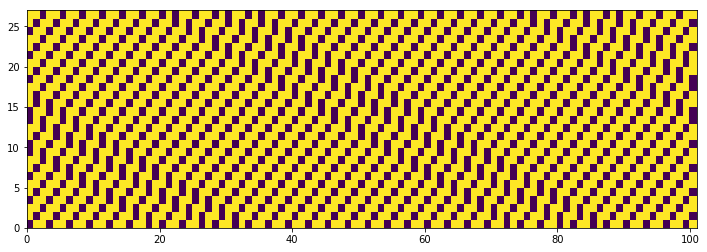

2
(101, 1, 27, 1)


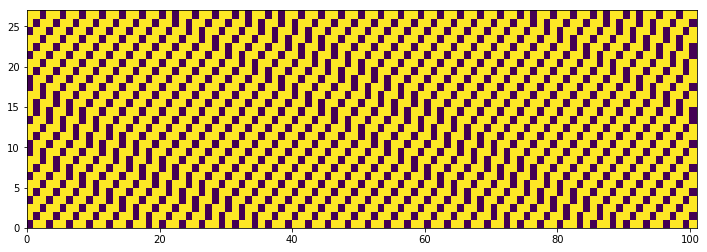

[None, None, None]

In [7]:
map(show,lst[:3])